#Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

#Load Data

In [ ]:
df = pd.read_csv('leetcode_contestant_rating_regression_dataset.csv')

In [ ]:
df.head()

,Contest Date,Number of Participants,Number of Problems Solved,Average Problem Difficulty,Contestant Rating
0,22-06-2022,609.0,0.0,6.027634,6.397237
1,26-12-2022,59.0,2.0,4.375872,12.562413
2,30-03-2022,446.0,0.0,3.927848,10.607215
3,30-11-2022,122.0,3.0,3.682415,14.131758
4,02-12-2022,481.0,2.0,4.736080,6.026392


In [ ]:
len(df)

1000

#Handle Missing

In [ ]:
df.isnull().sum()

Contest Date                  2
Number of Participants        2
Number of Problems Solved     2
Average Problem Difficulty    2
Contestant Rating             0
dtype: int64

In [ ]:
df = df.dropna()

#Discard Year

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 992 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Contest Date                992 non-null    object 
 1   Number of Participants      992 non-null    float64
 2   Number of Problems Solved   992 non-null    float64
 3   Average Problem Difficulty  992 non-null    float64
 4   Contestant Rating           992 non-null    float64
dtypes: float64(4), object(1)
memory usage: 46.5+ KB


In [ ]:
df['Contest Date'] = pd.to_datetime(df['Contest Date'], dayfirst=True)
df['day'] = df['Contest Date'].dt.day
df['month'] = df['Contest Date'].dt.month


In [ ]:
df.head()

,Contest Date,Number of Participants,Number of Problems Solved,Average Problem Difficulty,Contestant Rating,day,month
0,2022-06-22,609.0,0.0,6.027634,6.397237,22,6
1,2022-12-26,59.0,2.0,4.375872,12.562413,26,12
2,2022-03-30,446.0,0.0,3.927848,10.607215,30,3
3,2022-11-30,122.0,3.0,3.682415,14.131758,30,11
4,2022-12-02,481.0,2.0,4.736080,6.026392,2,12


In [ ]:
df = df.drop(['Contest Date'], axis=1)

In [ ]:
df.head()

,Number of Participants,Number of Problems Solved,Average Problem Difficulty,Contestant Rating,day,month
0,609.0,0.0,6.027634,6.397237,22,6
1,59.0,2.0,4.375872,12.562413,26,12
2,446.0,0.0,3.927848,10.607215,30,3
3,122.0,3.0,3.682415,14.131758,30,11
4,481.0,2.0,4.736080,6.026392,2,12


#Outliers

<Axes: ylabel='Number of Participants'>

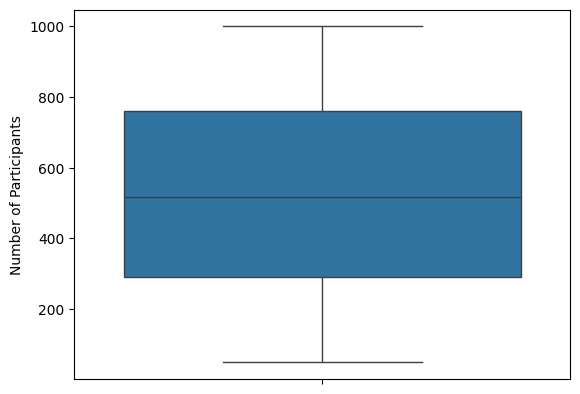

In [ ]:
sns.boxplot(df['Number of Participants'])

<Axes: ylabel='Number of Problems Solved'>

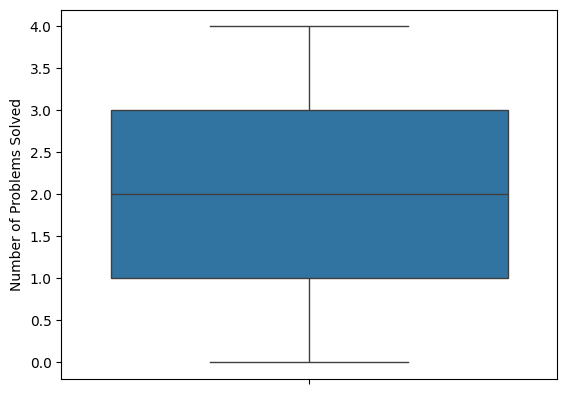

In [ ]:
sns.boxplot(df['Number of Problems Solved'])

<Axes: ylabel='Average Problem Difficulty'>

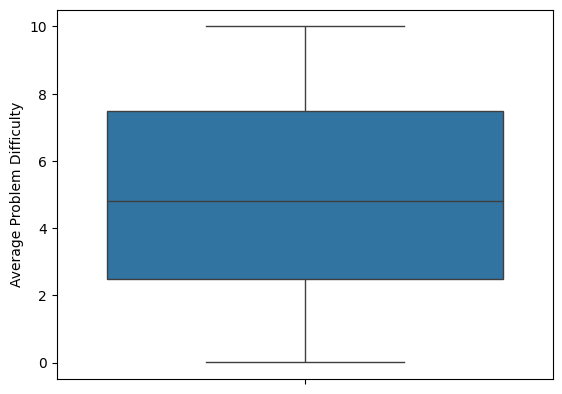

In [ ]:
sns.boxplot(df['Average Problem Difficulty'])

<Axes: ylabel='Contestant Rating'>

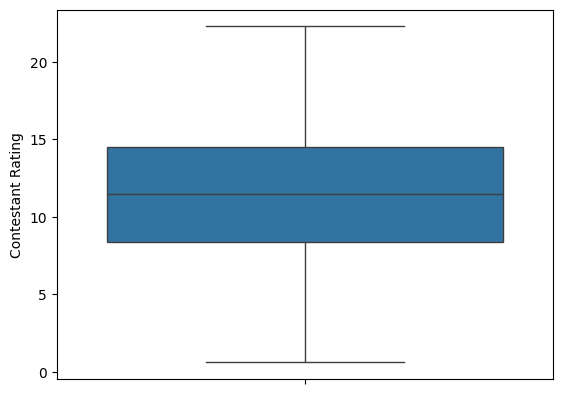

In [ ]:
sns.boxplot(df['Contestant Rating'])

#Normalize

In [ ]:
df_norm = df.copy()

In [ ]:
for column in df_norm:
    df_norm[column] = df_norm[column]  / df_norm[column].abs().max()

In [ ]:
df_norm.head()

,Number of Participants,Number of Problems Solved,Average Problem Difficulty,Contestant Rating,day,month
0,0.609610,0.00,0.602825,0.286938,0.709677,0.500000
1,0.059059,0.50,0.437632,0.563467,0.838710,1.000000
2,0.446446,0.00,0.392825,0.475770,0.967742,0.250000
3,0.122122,0.75,0.368279,0.633858,0.967742,0.916667
4,0.481481,0.50,0.473657,0.270304,0.064516,1.000000


                            Number of Participants  Number of Problems Solved  \
Number of Participants                    1.000000                  -0.019403   
Number of Problems Solved                -0.019403                   1.000000   
Average Problem Difficulty               -0.024050                  -0.000368   
Contestant Rating                         0.002208                   0.650863   
day                                      -0.008042                  -0.068223   
month                                    -0.031770                  -0.089832   

                            Average Problem Difficulty  Contestant Rating  \
Number of Participants                       -0.024050           0.002208   
Number of Problems Solved                    -0.000368           0.650863   
Average Problem Difficulty                    1.000000          -0.052665   
Contestant Rating                            -0.052665           1.000000   
day                                          -0

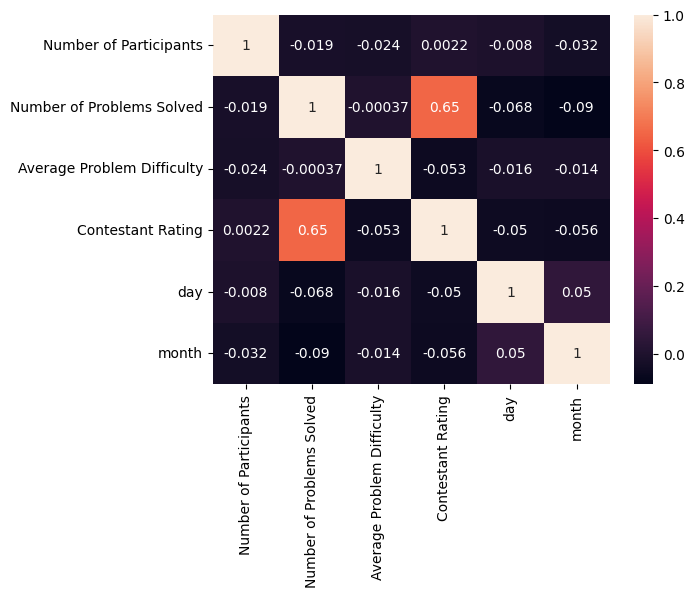

In [ ]:
print(df_norm.corr())
dataplot = sns.heatmap(df_norm.corr(), annot=True)
plt.show()

#Linear Regression

In [ ]:
df_norm.reset_index(drop=True, inplace=True)

In [ ]:
X = df_norm[['Number of Problems Solved']]
y = df_norm['Contestant Rating']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
X_train.head()

,Number of Problems Solved
358,0.25
542,0.00
111,0.50
892,0.75
105,0.50


In [ ]:
y_train.head()

358    0.380798
542    0.585351
111    0.768203
892    0.435005
105    0.509139
Name: Contestant Rating, dtype: float64

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
model.intercept_

0.3441272454175545

In [ ]:
model.coef_


array([0.34634451])

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_test,y_pred)

0.020765852376644887

#SVM

In [ ]:
from sklearn.svm import SVR
regressor = SVR()
regressor.fit(X_train, y_train)

SVR()

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
mean_squared_error(y_test,y_pred)

0.02106887602378065